In [65]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.draw import ellipse

In [7]:
def image_stats(h,w, scale):
    pixel_count = h*w
    h_scaled = scale * h
    w_scaled = scale * w
    pixel_count_scaled = h_scaled * w_scaled
    print("Resolution : ", h, ' x ', w)
    print(pixel_count/1000000, ' MP')
    print("Scaled Resolution : ", h_scaled, ' x ', w_scaled)
    print(pixel_count_scaled/1000000, ' MP')
    print(100*pixel_count_scaled/pixel_count, ' %')

In [8]:
h=4000
w=6000
scale = .25
image_stats(h,w,scale)

Resolution :  4000  x  6000
24.0  MP
Scaled Resolution :  1000.0  x  1500.0
1.5  MP
6.25  %


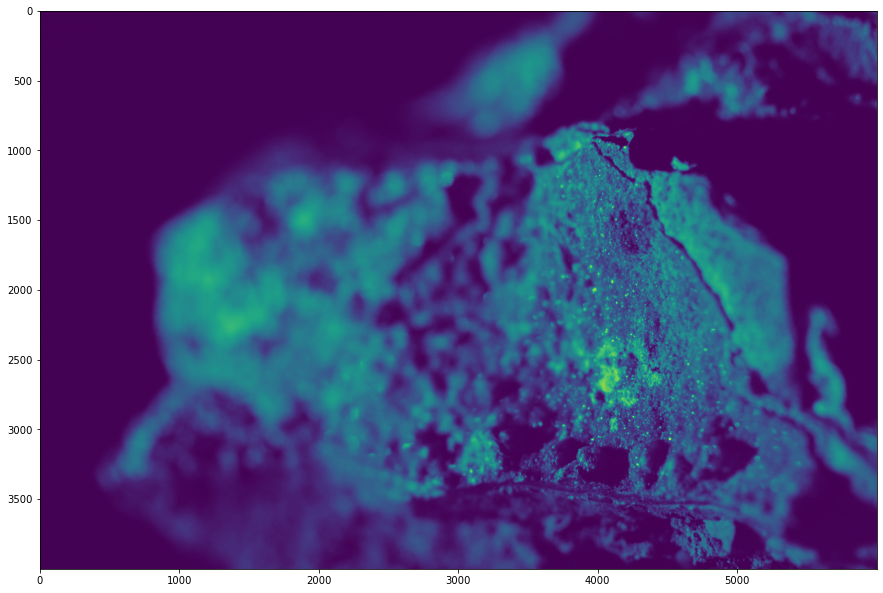

In [9]:
image = cv.imread('/Users/anthonyesposito/Pictures/macroni/Rosasite_w_Conacalcite/1/JPG/DSCF6931.jpg', cv.IMREAD_COLOR)
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
plt.imshow(image)

In [10]:
scale = .25

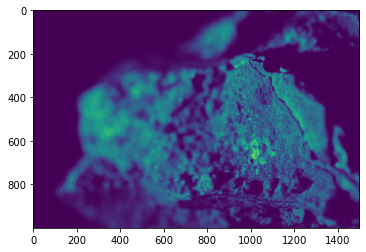

In [20]:
#result = cv.resize(image, dsize=(0), fx=scale, fy=scale)
result = cv.resize(image, None, 0, scale, scale, cv.INTER_NEAREST_EXACT)
plt.imshow(result)

In [50]:
result2 = cv.resize(image, None, image.shape, interpolation=cv.INTER_NEAREST_EXACT)

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-p8djv5ll/opencv/modules/imgproc/src/resize.cpp:4054: error: (-215:Assertion failed) inv_scale_x > 0 in function 'resize'


In [48]:
scales = np.arange(0,1,.05)
for i in scales:
    resized = (round(i * image.shape[0]), round(i * image.shape[1]))
    print(resized)


(0, 0)
(200, 300)
(400, 600)
(600, 900)
(800, 1200)
(1000, 1500)
(1200, 1800)
(1400, 2100)
(1600, 2400)
(1800, 2700)
(2000, 3000)
(2200, 3300)
(2400, 3600)
(2600, 3900)
(2800, 4200)
(3000, 4500)
(3200, 4800)
(3400, 5100)
(3600, 5400)
(3800, 5700)


In [43]:
round(123.3)

123

In [47]:
type(image.shape)

tuple

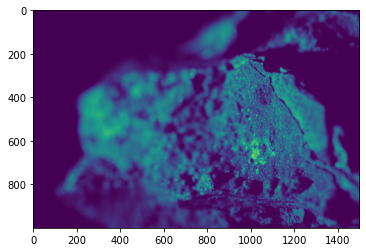

In [61]:
scaled_size = (int(image.shape[0] * scale),int(image.shape[1] * scale) )
result = resize(image, scaled_size, anti_aliasing=True)
plt.imshow(result)

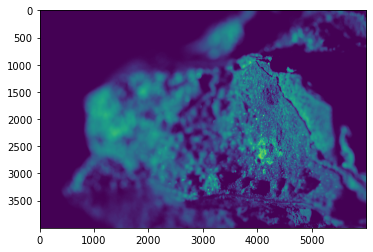

In [63]:
image_returned = resize(result, image.shape)
plt.imshow(image_returned)

In [71]:
test1 = np.zeros([4000,6000], dtype='uint8')
a = 1
for i in range(2000,100,-200):
    E = ellipse(2000,3000, i,i)
    if a == 1:
        test1[E] = 255
        a = 0
    else:
        test1[E] = 0
        a=1

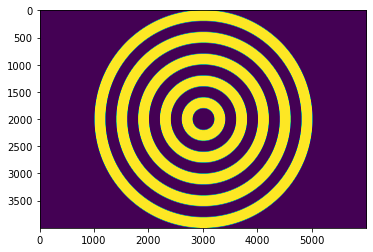

In [72]:
plt.imshow(test1)

[[255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0
    0   0]
 [255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0

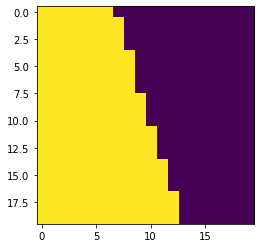

In [88]:
scaled_size = (int(test1.shape[0] * scale),int(test1.shape[1] * scale) )
result1_test1 = resize(test1, scaled_size, anti_aliasing=True)
result1_test1 = result1_test1.astype('uint8')*255
plt.imshow(result1_test1[550:650,250:350][80:,60:80])
print(result1_test1[550:650,250:350][80:,60:80])

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


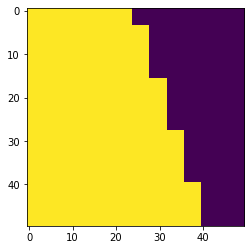

In [99]:
test1_returned = resize(result1_test1, test1.shape)
test1_returned = test1_returned.astype('uint8')*255
plt.imshow(test1_returned)
plt.imshow(test1_returned[2200:2600,1000:1400][350:400,250:300])
print(test1_returned[2200:2600,1000:1400][350:400,250:300])